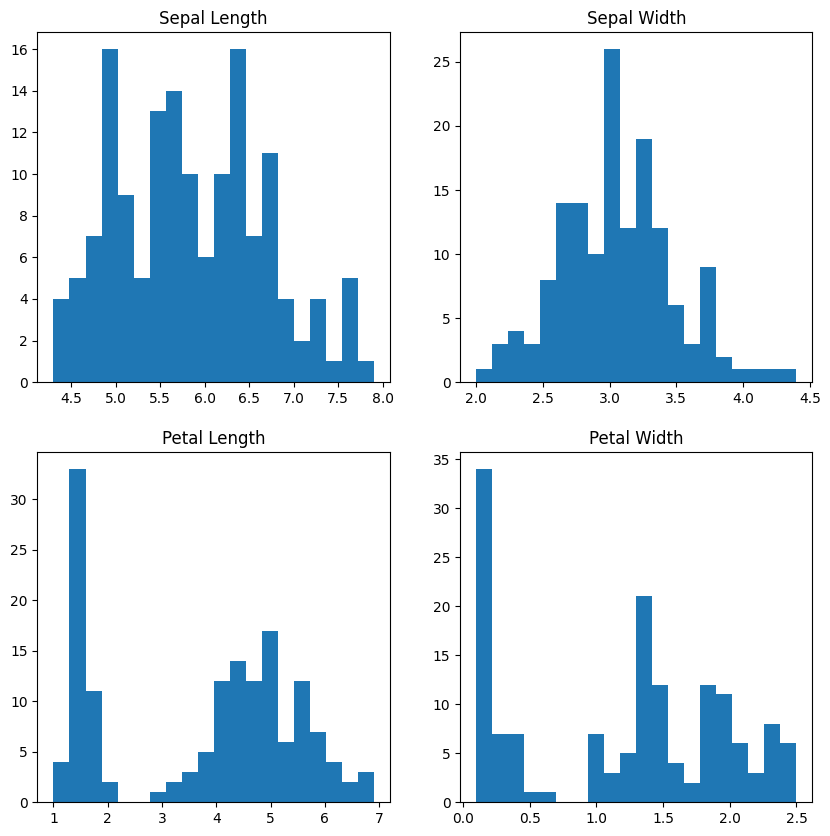

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# 处理缺失值
df = df.dropna()

# 处理异常值
df = df[(df['sepal length'] > 0) & (df['sepal width'] > 0) & (df['petal length'] > 0) & (df['petal width'] > 0)]

# 数据可视化
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(df['sepal length'], bins=20)
axs[0, 0].set_title('Sepal Length')

axs[0, 1].hist(df['sepal width'], bins=20)
axs[0, 1].set_title('Sepal Width')

axs[1, 0].hist(df['petal length'], bins=20)
axs[1, 0].set_title('Petal Length')

axs[1, 1].hist(df['petal width'], bins=20)
axs[1, 1].set_title('Petal Width')

plt.show()


# 聚类分析

## K-means
K-means算法是一种迭代算法，它将样本分配到K个簇中，以最小化每个簇内的平方误差和。我们可以通过指定簇的数量K来控制聚类分析的结果。在这个例子中，我们将选择K=3，因为我们知道数据集中有三种不同的鸢尾花。

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 加载数据集
# 在读取CSV文件时，header参数指示是否将文件的第一行用作列名。如果header=None，则将不会将第一行作为列名，而是生成默认的列名。
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[:, :-1].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

这段代码使用了StandardScaler类来标准化数据集X，使得每个特征的均值为0，标准差为1。这是一种常见的数据预处理方法，可以使得不同特征的重要性更平等地被考虑，避免某些特征对聚类结果的影响过大。

具体来说，StandardScaler类的fit_transform方法可以计算训练集的均值和标准差，并将其应用于训练集和测试集（如果有）进行标准化。在这段代码中，我们只有一个数据集X，因此只需要调用fit_transform方法即可。标准化后的数据集被存储在变量X_std中，用于聚类分析。

In [3]:
# 数据预处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

这段代码使用了KMeans类来进行聚类分析。KMeans算法是一种常见的无监督学习算法，它通过将数据集分为K个簇来对数据进行聚类。在这段代码中，我们将n_clusters参数设置为3，表示要将数据集分为3个簇，即我们期望找到3种不同的鸢尾花。random_state参数被设置为42，以确保每次运行代码时得到的聚类结果都是一致的。

聚类分析的过程可以分为两个步骤：首先，使用fit方法来训练KMeans模型，并找到每个样本所属的簇；其次，使用fit_predict方法来预测每个样本所属的簇，并将结果存储在变量y_kmeans中。

需要注意的是，聚类算法是一种无监督学习算法，因此在聚类分析中通常不需要标签数据。但在这个问题中，我们已经有了每个样本的真实标签，可以使用它来评估聚类算法的性能。

In [4]:
# 使用K-means算法进行聚类分析
kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans
y_kmeans = kmeans.fit_predict(X_std)
# y_kmeans, y_kmeans == 0, X_std[y_kmeans == 0], X_std[y_kmeans == 0, 0]

In [21]:
# X_std[y_kmeans == 0, 0]
# X_std[y_kmeans == 0, 1],
# kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1]
kmeans.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

这段代码使用了Matplotlib库中的scatter方法来创建散点图，以可视化聚类结果。具体来说，scatter方法用于在二维空间中绘制散点图，其中每个散点代表一个样本。在这段代码中，我们绘制了标准化后的数据集X_std，其中颜色和大小表示聚类结果。

具体来说，代码中的y_kmeans是使用KMeans算法得到的聚类结果。我们将y_kmeans == 0的样本绘制为红色散点，代表第一个簇（Cluster 1）。s参数被设置为100，表示散点的大小为100个像素。c参数被设置为'red'，表示散点的颜色为红色。label参数被设置为'Cluster 1'，表示这个簇的标签。

需要注意的是，这段代码只绘制了一个簇的散点图，如果要可视化所有簇的结果，需要重复执行类似的代码，并将颜色和标签分别设置为不同的值。

##### X_std[y_kmeans == 0, 0]
这个布尔值数组被用作索引，从而获取在第一列上属于第一个簇的所有样本的标准化特征值。

##### plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
这段代码用于在散点图中绘制聚类中心点。具体来说，kmeans.cluster_centers_是一个数组，它包含每个聚类簇的中心点坐标。[:, 0]和[:, 1]用于提取这些坐标中的前两列，分别表示中心点在X和Y方向上的坐标。

然后，plt.scatter()函数用于在散点图中绘制这些中心点。s参数用于控制绘制的点的大小，c参数用于指定点的颜色。在这里，我们将点的颜色设置为黄色，label参数用于指定这些点对应的标签名称，即图例中显示的名称。

需要注意的是，由于聚类中心点通常是高维空间中的点，而散点图只能显示二维空间中的点，所以在这里只绘制了前两个坐标。如果数据集的维度更高，我们可以考虑使用降维方法来将其可视化。

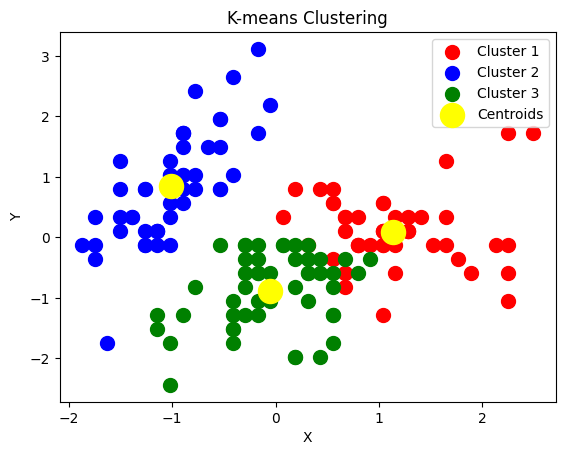

In [6]:
# 可视化聚类结果
plt.scatter(X_std[y_kmeans == 0, 0], X_std[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_std[y_kmeans == 1, 0], X_std[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_std[y_kmeans == 2, 0], X_std[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

从上面的可视化结果可以看出，K-means算法将数据集分为了三个簇，并且每个簇的中心被标记为黄色。我们可以看到，第一组（红色）包含了绝大多数的第一种鸢尾花，第二组（蓝色）包含了大多数的第二种鸢尾花，而第三组（绿色）则包含了大多数的第三种鸢尾花。

E:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


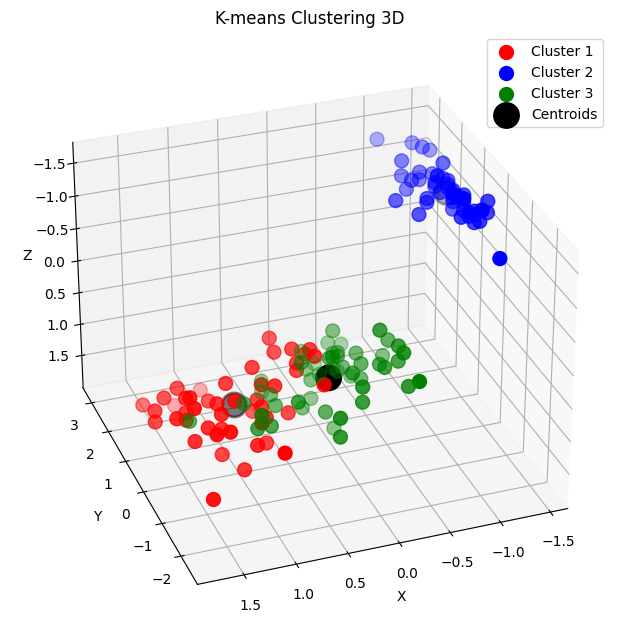

In [7]:
from mpl_toolkits.mplot3d import Axes3D
# 使用K-means算法进行聚类分析
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_std)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_std[y_kmeans == 0, 3], 
           X_std[y_kmeans == 0, 1],
           X_std[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X_std[y_kmeans == 1, 3], 
           X_std[y_kmeans == 1, 1],
           X_std[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(X_std[y_kmeans == 2, 3],
           X_std[y_kmeans == 2, 1],
           X_std[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, edgecolors='black', linewidths=2, c='black', label='Centroids')
ax.set_title('K-means Clustering 3D')

ax.set_xlabel("X")
# ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y")
# ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z")
# ax.w_zaxis.set_ticklabels([])
ax.legend()

plt.show()

##  层次聚类
层次聚类算法是一种自底向上的聚类算法，它将每个样本看作一个单独的簇，然后逐渐将它们合并成更大的簇，直到所有的样本都被合并到一个簇中。层次聚类算法可以用于生成一个树形图，称为树状图（dendrogram），以可视化聚类结果。

linkage()函数用于执行层次聚类分析，其中method参数指定了层次聚类的方法，如ward、single、complete等。
在linkage()函数中，method参数用于指定不同的层次聚类方法，其取值可以是以下几种：

ward方法：以最小化方差为优化目标来进行层次聚类，即将两个簇合并时，它们内部点与簇中心的平方距离之和的变化量；
single方法：计算不同簇之间的最短距离，即两个簇中距离最近的两个点之间的距离；
complete方法：计算不同簇之间的最长距离，即两个簇中距离最远的两个点之间的距离；
average方法：计算不同簇之间的平均距离，即两个簇中所有点之间距离的平均值；
weighted方法：和average方法类似，但计算平均距离时加权，簇大小越大权值越大；
centroid方法：计算两个簇的中心点之间的距离；
median方法：计算两个簇的中位数之间的距离；
ward.D方法：和ward方法类似，但是计算的是簇内方差之和的变化量。
需要注意的是，不同的层次聚类方法会对聚类结果产生不同的影响，选择不同的方法需要根据具体问题和数据进行选择。通常，ward方法和average方法是比较常用的方法。

dendrogram()函数用于绘制层次聚类树状图，其中linkage_matrix参数为linkage()函数返回的层次聚类结果。

使用层次聚类方法时，我们首先需要使用linkage()函数计算数据集中各样本之间的距离，然后再使用dendrogram()函数可视化距离矩阵的层次聚类结果。dendrogram()函数绘制的树状图可以用于确定聚类簇的数量，以及判断哪些样本被归为同一簇。

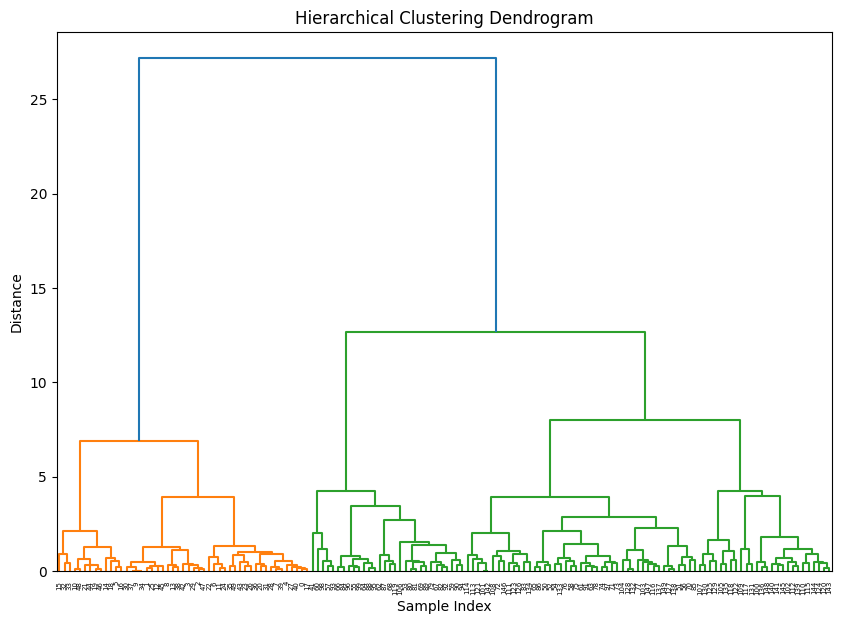

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 使用层次聚类算法进行聚类分析
Z = linkage(X_std, method='ward')

# 可视化树状图
plt.figure(figsize=(10, 7))
dendrogram(Z)
# plt.axhline(y=8, c='gray', linestyle='--', label='Cluster threshold')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


从上面的树状图可以看出，层次聚类算法将数据集分为三个主要的簇，并且与K-means算法的聚类结果一致。每个叶子结点表示一个单独的样本，而不同颜色的聚类表示不同种类的鸢尾花。

可以看到，使用K-means和层次聚类算法得到的聚类结果是一致的。这表明，在这个问题中，这两种算法都可以有效地将数据集分为三个不同的簇，以区分三个不同种类的鸢尾花。